<a href="https://colab.research.google.com/github/sieun-Bae/deep-learning/blob/master/imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
!pip install tensorflow==2.0.0-beta0

print(tf.__version__)

#tf.enable_eager_execution()

!pip install -q tensorflow-datasets

2.0.0-beta0
2.0.0-beta0


### 1. Load Data

In [5]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


### 2. Data Preparation

In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


### 3. Tokenising and Padding

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



### 4. View reviews before and after tokenising and padding

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

### 5. Define neural network

In [15]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 665,229
Trainable params: 665,229
Non-trainable params: 0
_________________________________________________________________


### 6. Train & Validate

In [16]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 94s 4ms/sample - loss: 0.6992 - acc: 0.5048 - val_loss: 0.6936 - val_acc: 0.5002
Epoch 2/10
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.6926 - acc: 0.5165 - val_loss: 0.6924 - val_acc: 0.5120
Epoch 3/10
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.6920 - acc: 0.5188 - val_loss: 0.6918 - val_acc: 0.5223
Epoch 4/10
25000/25000 [==============================] - 96s 4ms/sample - loss: 0.6916 - acc: 0.5256 - val_loss: 0.6920 - val_acc: 0.5239
Epoch 5/10
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.6909 - acc: 0.5300 - val_loss: 0.6932 - val_acc: 0.5132
Epoch 6/10
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.6905 - acc: 0.5325 - val_loss: 0.6910 - val_acc: 0.5281
Epoch 7/10
25000/25000 [==============================] - 98s 4ms/sample - loss: 0.6894 - acc: 0.5352 - val_loss: 0.

### 7. Plot Accuracies and Losses of Training and Validation

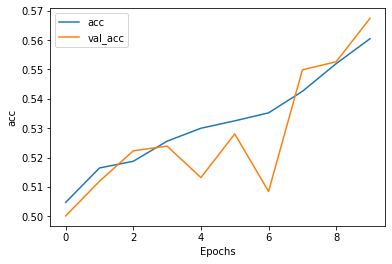

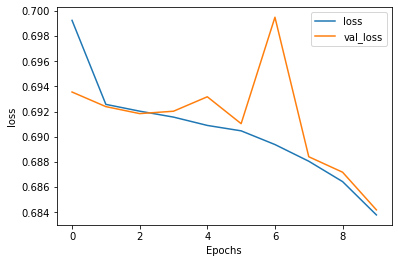

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

### 8. Define NN with 1D CONV and a GlobalAveragePooling1D

In [18]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


### 9. Training

In [19]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 10s 394us/sample - loss: 0.4582 - accuracy: 0.7764 - val_loss: 0.3484 - val_accuracy: 0.8475
Epoch 2/10
25000/25000 [==============================] - 10s 393us/sample - loss: 0.2789 - accuracy: 0.8866 - val_loss: 0.3507 - val_accuracy: 0.8471
Epoch 3/10
25000/25000 [==============================] - 10s 396us/sample - loss: 0.2234 - accuracy: 0.9134 - val_loss: 0.3831 - val_accuracy: 0.8371
Epoch 4/10
25000/25000 [==============================] - 10s 389us/sample - loss: 0.1814 - accuracy: 0.9335 - val_loss: 0.4234 - val_accuracy: 0.8339
Epoch 5/10
25000/25000 [==============================] - 10s 394us/sample - loss: 0.1463 - accuracy: 0.9498 - val_loss: 0.4961 - val_accuracy: 0.8263
Epoch 6/10
25000/25000 [==============================] - 10s 394us/sample - loss: 0.1165 - accuracy: 0.9624 - val_loss: 0.6037 - val_accuracy: 0.8154
Epoch 7/10
25000/25000 [====================

10. Plot the graphs

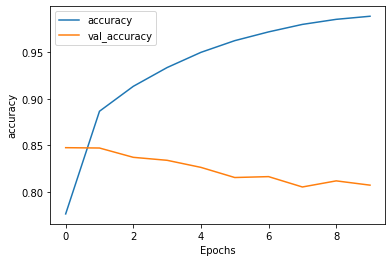

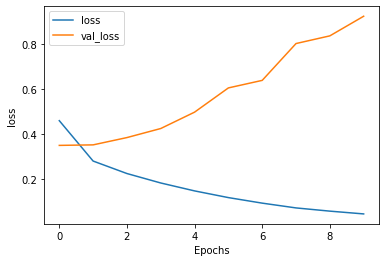

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')